<a href="https://colab.research.google.com/github/Eduardoluizfrancelianoda/aulasPA/blob/main/C%C3%B3pia_de_taxadesobrevivenciatitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**pergunta1** a classe do passageiro influencia na sobrevivencia?

**pergunta2** a idade do passageiro influencia na sobrevivencia?

**pergunta3** a quantidade de irmãos ou pais do passageiro influenciou na sobrevivencia?

**pergunta4** o numero da cabine do passageiro influenciou na sobrevivencia?

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Eduardoluizfrancelianoda/aulasPA/refs/heads/main/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Tratamento de valores faltantes: preencher ou remover
df.ffill(inplace=True)

In [ ]:
# Remover duplicatas
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [ ]:
def definir_sobreviveu(prob):
    if prob == 0:
        return 'não'
    elif prob == 1:
        return 'sim'

df['Sobreviveu'] = df['Survived'].map({0: 'Não Sobreviveu', 1: 'Sobreviveu'})

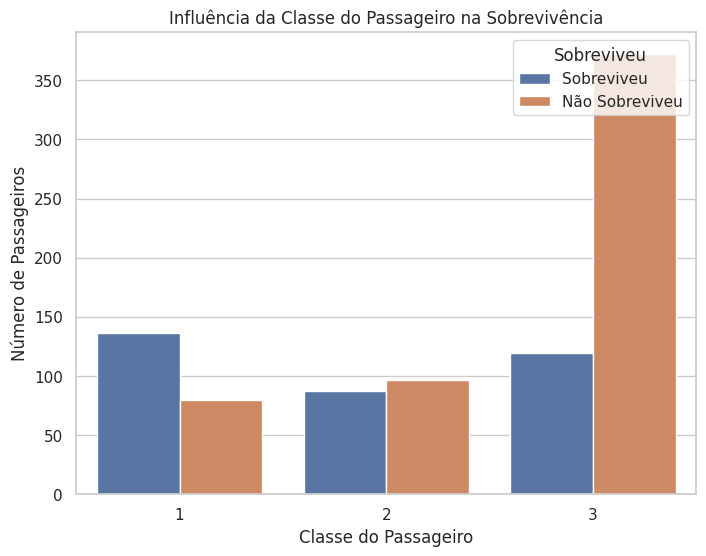

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Sobreviveu', data=df)  # Usar 'Sobreviveu' aqui
plt.title('Influência da Classe do Passageiro na Sobrevivência')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()


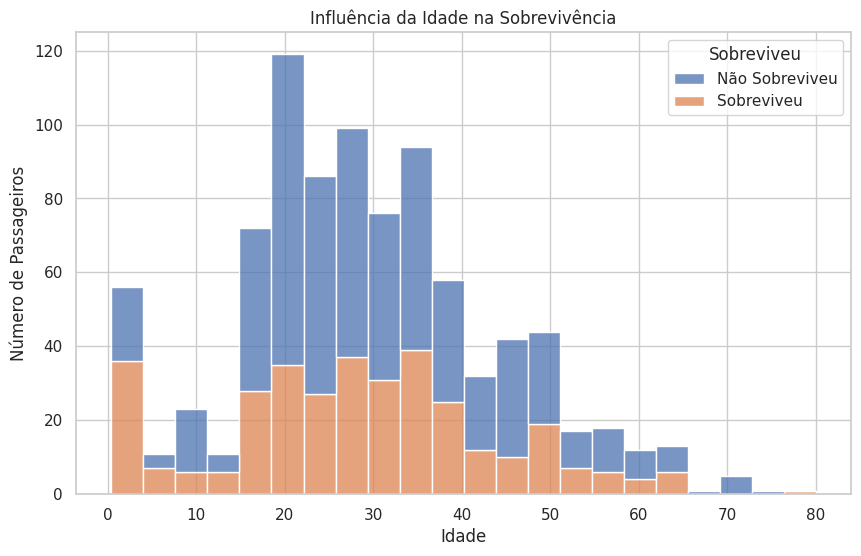

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Sobreviveu', multiple='stack', kde=False)  # Usar 'Sobreviveu' aqui
plt.title('Influência da Idade na Sobrevivência')
plt.xlabel('Idade')
plt.ylabel('Número de Passageiros')
plt.show()

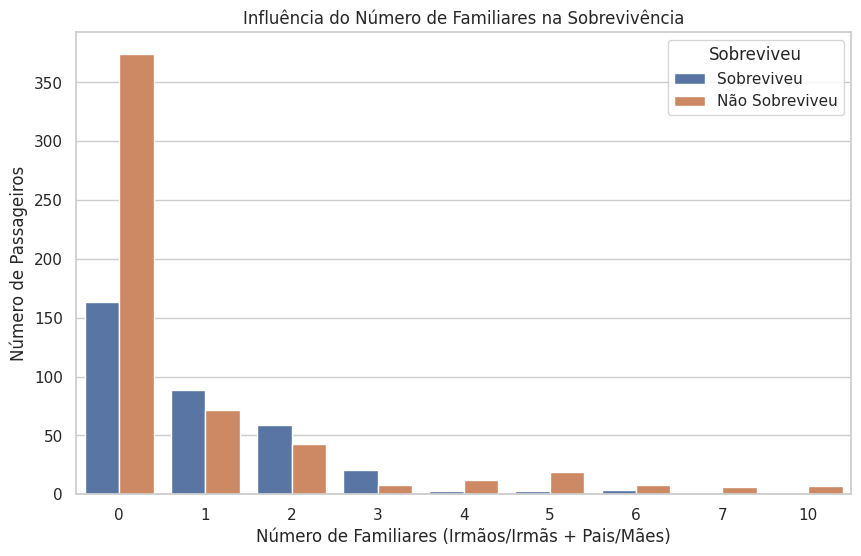

In [ ]:
df['Familia'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='Familia', hue='Sobreviveu', data=df)
plt.title('Influência do Número de Familiares na Sobrevivência')
plt.xlabel('Número de Familiares (Irmãos/Irmãs + Pais/Mães)')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

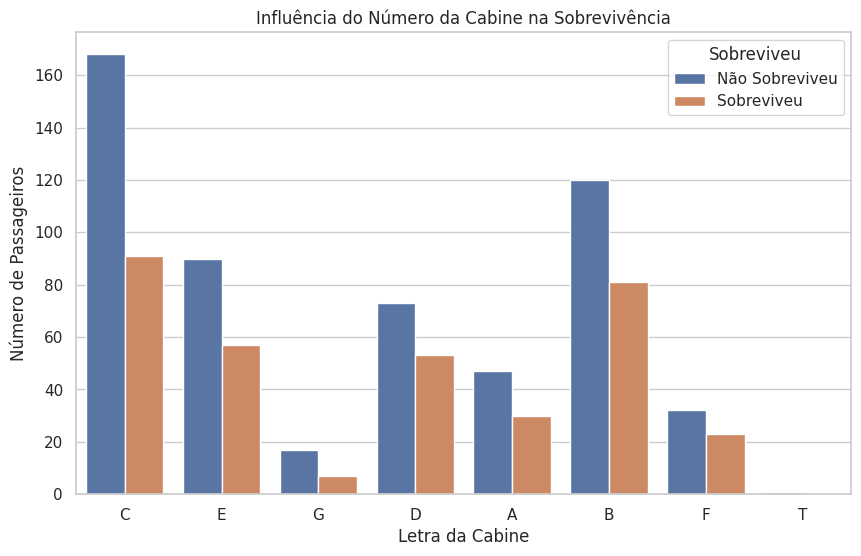

In [ ]:
df['Cabine'] = df['Cabin'].str.extract('([A-Za-z])', expand=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Cabine', hue='Sobreviveu', data=df)
plt.title('Influência do Número da Cabine na Sobrevivência')
plt.xlabel('Letra da Cabine')
plt.ylabel('Número de Passageiros')
plt.legend(title='Sobreviveu', loc='upper right')
plt.show()

# **conclusões**

**conclusão 1:** Ao analisar o gráfico, pode-se concluir que a classe do passageiro influencia significativamente na taxa de sobrevivência. Passageiros da 1ª classe tiveram uma taxa de sobrevivência maior em comparação com aqueles da 2ª e 3ª classes. Os passageiros da 3ª classe, em particular, tiveram a menor taxa de sobrevivência. Isso ocorre porque, durante o incidente, quase ninguem destrancou os portões que deixavam os passageiros de 3ª classe sairem de sua area.

**conclusão 2** Com base no gráfico, a idade dos passageiros influenciou a taxa de sobrevivência. jovens apresentaram uma maior probabilidade de sobrevivência, enquanto os adultos mais velhos, especialmente os da 3ª classe, mostraram taxas mais baixas. Isso pode indicar que, em situações de emergência, pessoas mais jovens foram priorizadas.

**conclusão 3** O gráfico indica que a presença de um ou dois parentes a bordo está associada a taxas de sobrevivência mais altas, sugerindo que o apoio familiar pode ter facilitado a evacuação. Em contraste, passageiros sem familiares tendem a ter uma taxa de sobrevivência mais baixa. Isso pode ser explicado pelo fato de que os passageiros sem parentes a bordo eram uma demografia significativa, o que pode ter inflacionado os números observados no gráfico.

**Conclusão 4** Após analisar o gráfico, pode-se observar que a localização dos passageiros, representada pela letra da cabine, parece influenciar as taxas de sobrevivência. Passageiros em cabines localizadas em áreas consideradas mais centrais ou acessíveis podem ter tido mais facilidade para evacuar, enquanto aqueles em cabines mais distantes enfrentaram maiores desafios. Essa dinâmica sugere que a localização a bordo teve um papel significativo nas chances de sobrevivência.